# First steps with Jupyter Notebook

To have plots show up inline we can use the following line magic

In [52]:
%matplotlib inline

Then, we import some libraries

In [53]:
import numpy as np
import matplotlib.pyplot as plt

Next we define a function for a sigle frequency component

In [54]:
def f(t, d=0, T2=1):
    comp = np.zeros(t.shape[-1],dtype='complex64')
    comp.real = np.cos(2*np.pi*d*t) * np.exp(-t/T2)
    comp.imag = np.sin(2*np.pi*d*t) * np.exp(-t/T2)
    return comp

We then define the time scale

In [55]:
t = np.arange(0.0, 5.0, 0.02)

Now we are ready to build a synthetic FID by defining some frequency components

In [56]:
shifts = [0,5.,10.,15.,20.]
T2s = [0.1,0.2,0.5,1.2,2.2]
comps = [f(t, d, t2) for (d,t2) in zip(shifts, T2s)]

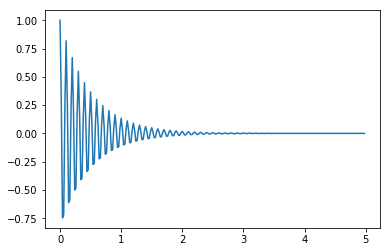

In [57]:
plt.plot(t, comps[2].real)

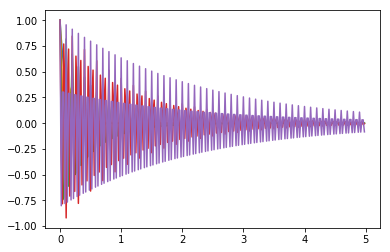

In [58]:
for c in comps : plt.plot(t, c.real)

In [59]:
ints = [1,2,3,2,3]
sum = np.zeros(len(t), dtype='complex128')
for i,c in zip(ints, comps):
    sum += i * c

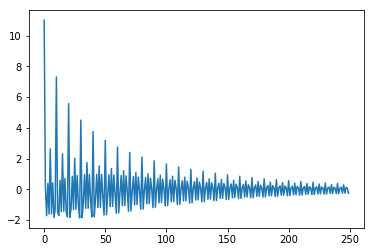

In [60]:
plt.plot(sum.real)


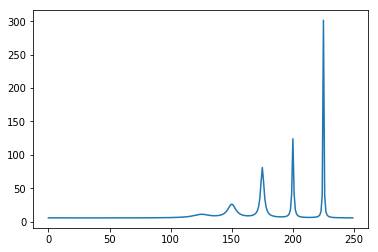

In [61]:
ft = np.fft.fftshift(np.fft.fft(sum))
plt.plot(ft.real)

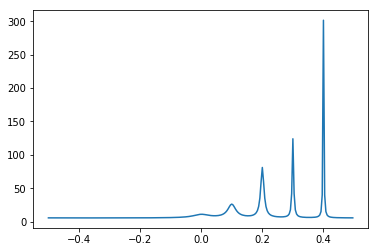

In [62]:
fscale = np.fft.fftshift(np.fft.fftfreq(250))
plt.plot(fscale, ft.real)